## Visualize keypoint predictions

1. Load the model 
1. Load an image and it's ground truth keypoints (needs pysolo for that)
1. Convert the image to the correct tensor
1. Run the model on the tensor to get the predicted keypoints
1. Plot the ground truth keypoints on the image in green
1. Plot the predicted keypoints on the image in blue
1. Show the images side-by-side for comparison


### Load the model

In [14]:
from litvgg16 import LitVGG16, TennisCourtImageHelper
from PIL import Image
from IPython.display import Image as DisplayImage
from IPython.display import display
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

In [2]:
model_path = "saved_models/model=224_224_31-train_loss=0.2557.ckpt"
model = LitVGG16.load_from_checkpoint(model_path, num_epochs=-1)

Using cache found in /Users/tleyden/.cache/torch/hub/pytorch_vision_v0.6.0
/opt/miniconda3/envs/tennis_court_cnn/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/tennis_court_cnn/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Load an image and it's ground truth keypoints (needs pysolo for that)

In [3]:
data_path_root = '/Users/tleyden/Library/Application Support/DefaultCompany/TennisCourt/solo_7'
image_path = 'sequence.49/step0.camera.png'
flattened_keypoints = [382.18222, 26.3798828, 607.4084, 28.1077271, 410.833862, 26.59967, 579.454, 27.8931885, 582.07074, 111.802765, 494.122925, 111.096619, 406.8902, 110.396271, 616.579041, 224.423187, 365.377258, 221.744019, 589.249756, 342.009369, 490.556854, 340.917358, 392.7317, 339.225647, 627.539368, 459.0492, 592.8823, 458.493835, 383.9513, 456.281982, 348.4407, 456.170074]
image = Image.open(os.path.join(data_path_root, image_path))

newsize = (224, 224)
image_224_224 = image.resize(newsize)

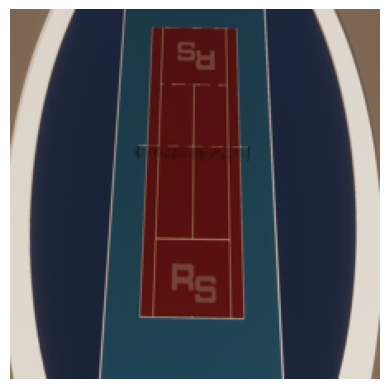

In [4]:
plt.imshow(image_224_224)
plt.axis('off')
plt.show()

### Plot the ground truth keypoints on the image in green

In [5]:
keypoint_pairs = [(int(flattened_keypoints[i]), int(flattened_keypoints[i + 1])) for i in range(0, len(flattened_keypoints), 2)]
keypoint_pairs

[(382, 26),
 (607, 28),
 (410, 26),
 (579, 27),
 (582, 111),
 (494, 111),
 (406, 110),
 (616, 224),
 (365, 221),
 (589, 342),
 (490, 340),
 (392, 339),
 (627, 459),
 (592, 458),
 (383, 456),
 (348, 456)]

In [6]:
cv_image = cv2.imread(os.path.join(data_path_root, image_path))

In [38]:
def plot_keypoints_on_image(keypoint_pairs, target_cv_image, color, radius):

    # Define the circle parameters
    for keypoint_pair in keypoint_pairs:
        center_coordinates = keypoint_pair  # (x, y) coordinates of the center
        thickness = 2  # Thickness of the circle's outline

        # Draw the circle on the image
        cv2.circle(target_cv_image, center_coordinates, radius, color, thickness)

In [36]:
plot_keypoints_on_image(keypoint_pairs, cv_image, (0, 0, 255), 5)

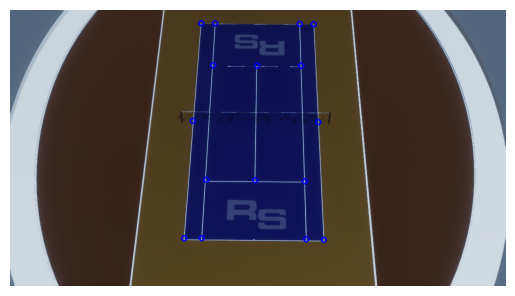

In [37]:
plt.imshow(cv_image)
plt.axis('off')
plt.show()

### Convert the image to the correct tensor

In [9]:
img_tensor, img_size = TennisCourtImageHelper.imagepath2tensor(data_path_root, image_path, (224, 224))

/opt/miniconda3/envs/tennis_court_cnn/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [10]:
img_tensor.shape

torch.Size([3, 224, 224])

### Run the model on the tensor to get the predicted keypoints

In [19]:
# Create a batch of a single tensor
img_tensor_batch = img_tensor.unsqueeze(0)

predicted_flattened_keypoints = model(img_tensor_batch)

In [25]:
predicted_flattened_keypoints

tensor([[ 86.3781,  10.7676, 136.8232,  11.4953,  92.6693,  10.5147, 130.6371,
          11.6423, 131.0970,  46.2367, 111.3401,  45.2219,  91.7891,  45.8477,
         139.4714,  90.8299,  82.3726,  89.6388, 132.6665, 138.6466, 110.5910,
         137.9655,  88.5039, 137.2799, 141.6139, 186.2040, 133.7552, 186.0112,
          86.7143, 184.3927,  78.5422, 184.7788]], grad_fn=<AddmmBackward0>)

### Plot the predicted keypoints on the image in blue

In [28]:
predicted_flattened_keypoints[0].tolist()

[86.37811279296875,
 10.767584800720215,
 136.82318115234375,
 11.495256423950195,
 92.66927337646484,
 10.514686584472656,
 130.6370849609375,
 11.642311096191406,
 131.09695434570312,
 46.23670196533203,
 111.34012603759766,
 45.22187423706055,
 91.7890625,
 45.84773254394531,
 139.4713592529297,
 90.82986450195312,
 82.37256622314453,
 89.63882446289062,
 132.6665496826172,
 138.6465606689453,
 110.59095001220703,
 137.9654541015625,
 88.50387573242188,
 137.2798614501953,
 141.6138916015625,
 186.2040252685547,
 133.7551727294922,
 186.01124572753906,
 86.71434783935547,
 184.3926544189453,
 78.54224395751953,
 184.77883911132812]

In [40]:
opencv_img_224_224 = cv2.cvtColor(np.array(image_224_224), cv2.COLOR_RGB2BGR)

predicted_flattened_keypoints_list = predicted_flattened_keypoints[0].tolist()

predicted_keypoint_pairs = [(int(predicted_flattened_keypoints_list[i]), int(predicted_flattened_keypoints_list[i + 1])) for i in range(0, len(predicted_flattened_keypoints_list), 2)]

In [30]:
predicted_keypoint_pairs

[(86, 10),
 (136, 11),
 (92, 10),
 (130, 11),
 (131, 46),
 (111, 45),
 (91, 45),
 (139, 90),
 (82, 89),
 (132, 138),
 (110, 137),
 (88, 137),
 (141, 186),
 (133, 186),
 (86, 184),
 (78, 184)]

In [41]:
plot_keypoints_on_image(predicted_keypoint_pairs, opencv_img_224_224, (255, 0, 0), 2)

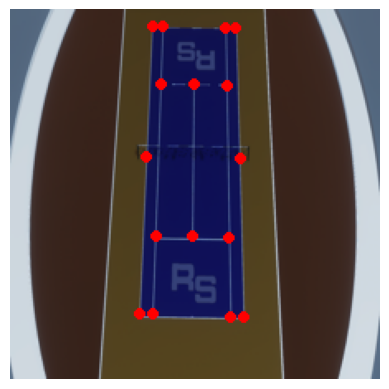

In [42]:
plt.imshow(opencv_img_224_224)
plt.axis('off')
plt.show()